### 셀프 주유소가 정말 저렴할까? - 데이터 확보하기 위한 작업
- https://www.opinet.co.kr/searRgSelect.do
- 사이트 구조 확인
- 목표 데이터
    - 브랜드
    - 가격
    - 셀프 주유 여부
    - 위치

In [1]:
# 셀레니움으로 접근
from selenium import webdriver

In [2]:
# 페이지 접근
url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome("chromedriver.exe")

C:\Users\JUNGSU~1\AppData\Local\Temp/ipykernel_18936/2016023566.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("chromedriver.exe")


In [4]:
driver.get(url)

- 문제
    1. 해당 url로 한 번에 접근 안됨
    2. 메인페이지로 접속되고, 팝업창이 뜸

In [5]:
import time

In [ ]:
# 팝업창 화면 전환 후 닫아주기
driver.switch_to_window(driver.window_handles[-1])
driver.close()

# 메인화면 창으로 전환
driver.switch_to_window(driver.window_handles[-1])

In [ ]:
# 접근 페이지 다시 요청
driver.get(url)

In [8]:
# 하나의 코드로 나타내면

from selenium import webdriver
import time

url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome("chromedriver.exe")
driver.get(url)

time.sleep(3)

driver.switch_to_window(driver.window_handles[-1])
driver.close()

time.sleep(3)

driver.switch_to_window(driver.window_handles[-1])

driver.get(url)

C:\Users\JUNGSU~1\AppData\Local\Temp/ipykernel_18936/615315290.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("chromedriver.exe")


In [ ]:
# 함수로 나타내면
def main_get():
    url = "https://www.opinet.co.kr/searRgSelect.do"
    driver = webdriver.Chrome("chromedriver.exe")
    driver.get(url)

    time.sleep(3)

    driver.switch_to_window(driver.window_handles[-1])
    driver.close()

    time.sleep(3)

    driver.switch_to_window(driver.window_handles[-1])

    driver.get(url)

main_get()

In [9]:
# 지역: 시/도
sido_list_raw = driver.find_element_by_id("SIDO_NM0")
sido_list_raw.text

C:\Users\JUNGSU~1\AppData\Local\Temp/ipykernel_18936/3851275696.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  sido_list_raw = driver.find_element_by_id("SIDO_NM0")


'            시/도\n            \n             \n              서울\n             \n             \n            \n             \n             \n              부산\n             \n            \n             \n             \n              대구\n             \n            \n             \n             \n              인천\n             \n            \n             \n             \n              광주\n             \n            \n             \n             \n              대전\n             \n            \n             \n             \n              울산\n             \n            \n             \n             \n              세종\n             \n            \n             \n             \n              경기\n             \n            \n             \n             \n              강원\n             \n            \n             \n             \n              충북\n             \n            \n             \n             \n              충남\n             \n            \n             \n             \n              

In [12]:
# element(s)!!! 가져오려는 데이터가 여러 개일 때
sido_list = sido_list_raw.find_elements_by_tag_name("option")
len(sido_list), sido_list[1].text

(18, '서울')

In [14]:
sido_list[1].get_attribute("value")

'서울특별시'

In [15]:
# 1.
sido_names = []
for option in sido_list:
    sido_names.append(option.get_attribute("value"))

sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [16]:
# 2. list comprehension 사용
sido_names = [option.get_attribute("value") for option in sido_list]
sido_names[:5]

['', '서울특별시', '부산광역시', '대구광역시', '인천광역시']

In [17]:
# 맨 앞 데이터 제외
sido_names = sido_names[1:]
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [18]:
sido_names[0]

'서울특별시'

In [24]:
sido_list_raw.send_keys(sido_names[0])

In [25]:
# 구

gu_list_raw = driver.find_element_by_id("SIGUNGU_NM0") # 부모 태그
gu_list = gu_list_raw.find_elements_by_tag_name("option") # 자식 태그

gu_names = [option.get_attribute("value") for option in gu_list]
gu_names = gu_names[1:]
gu_names[:5], len(gu_names)

C:\Users\JUNGSU~1\AppData\Local\Temp/ipykernel_18936/1944756776.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  gu_list_raw = driver.find_element_by_id("SIGUNGU_NM0") # 부모 태그


(['강남구', '강동구', '강북구', '강서구', '관악구'], 25)

In [26]:
gu_list_raw.send_keys(gu_names[15])

In [27]:
# 엑셀 저장
driver.find_element_by_css_selector("#glopopd_excel > span").click()

C:\Users\JUNGSU~1\AppData\Local\Temp/ipykernel_18936/1464983903.py:2: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.find_element_by_css_selector("#glopopd_excel > span").click()


In [ ]:
# driver.find_element_by_xpath('//*[@id="glopopd_excel"]/span').click()

In [ ]:
# element_get_excel = driver.find_element_by_id("glopopd_excel")
# element_get_excel.click()

In [28]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    time.sleep(3)
    
    element_get_excel = driver.find_element_by_xpath('//*[@id="glopopd_excel"]/span').click()
    time.sleep(2)

C:\Users\JUNGSU~1\AppData\Local\Temp/ipykernel_18936/1216676097.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


  0%|          | 0/25 [00:04<?, ?it/s]

C:\Users\JUNGSU~1\AppData\Local\Temp/ipykernel_18936/1216676097.py:5: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  element = driver.find_element_by_id("SIGUNGU_NM0")
C:\Users\JUNGSU~1\AppData\Local\Temp/ipykernel_18936/1216676097.py:9: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  element.get_excel = driver.find_element_by_xpath('//*[@id="glopopd_excel"]/span').click()


In [29]:
driver.close()

### 데이터 정리하기

In [30]:
import pandas as pd
from glob import glob

In [35]:
# 파일 목록 한 번에 가져오기
glob("지역_*.xls")

['지역_위치별(주유소) (1).xls',
 '지역_위치별(주유소) (10).xls',
 '지역_위치별(주유소) (11).xls',
 '지역_위치별(주유소) (12).xls',
 '지역_위치별(주유소) (13).xls',
 '지역_위치별(주유소) (14).xls',
 '지역_위치별(주유소) (15).xls',
 '지역_위치별(주유소) (16).xls',
 '지역_위치별(주유소) (17).xls',
 '지역_위치별(주유소) (18).xls',
 '지역_위치별(주유소) (19).xls',
 '지역_위치별(주유소) (2).xls',
 '지역_위치별(주유소) (20).xls',
 '지역_위치별(주유소) (21).xls',
 '지역_위치별(주유소) (22).xls',
 '지역_위치별(주유소) (23).xls',
 '지역_위치별(주유소) (24).xls',
 '지역_위치별(주유소) (25).xls',
 '지역_위치별(주유소) (3).xls',
 '지역_위치별(주유소) (4).xls',
 '지역_위치별(주유소) (5).xls',
 '지역_위치별(주유소) (6).xls',
 '지역_위치별(주유소) (7).xls',
 '지역_위치별(주유소) (8).xls',
 '지역_위치별(주유소) (9).xls']

In [36]:
# 파일명 저장
stations_files = glob("지역_*.xls")
stations_files[:5]

['지역_위치별(주유소) (1).xls',
 '지역_위치별(주유소) (10).xls',
 '지역_위치별(주유소) (11).xls',
 '지역_위치별(주유소) (12).xls',
 '지역_위치별(주유소) (13).xls']

In [37]:
# 하나만 읽어보기
tmp = pd.read_excel(stations_files[0], header=2)
tmp.tail(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
32,서울특별시,갤러리아주유소,서울 강남구 압구정로 426,SK에너지,02-540-4965,N,2772,2574,2533,-
33,서울특별시,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),GS칼텍스,02-518-5141,N,2838,2598,2590,1850


In [ ]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

- 형태 맞춰주기 위해

In [40]:
stations_raw = pd.concat(tmp_raw)
stations_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,2035,2091,-
1,서울특별시,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,현대오일뱅크,02-2226-4963,Y,2222,2047,2068,-
2,서울특별시,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,02-529-5101,Y,2287,2062,2070,-
3,서울특별시,대교주유소,서울 강남구 강남대로 640 (신사동),SK에너지,02-512-5521,N,2290,2070,2100,-
4,서울특별시,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),현대오일뱅크,02-3462-5215,N,2302,2077,2085,1700
...,...,...,...,...,...,...,...,...,...,...
10,서울특별시,신성주유소,서울 노원구 월계로 328 (월계동),S-OIL,02-916-4334,Y,-,2088,2098,-
11,서울특별시,노원주유소,서울 노원구 동일로 1008 (공릉동),GS칼텍스,02-949-5151,N,-,2109,2129,1600
12,서울특별시,하계삼호주유소,서울 노원구 공릉로 294 (하계동),GS칼텍스,02-974-8818,N,-,2145,2285,-
13,서울특별시,상계동주유소,서울 노원구 노원로26길 191 (상계동),현대오일뱅크,02-936-5035,N,-,2160,2190,2000


In [41]:
stations_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 0 to 14
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      455 non-null    object
 1   상호      455 non-null    object
 2   주소      455 non-null    object
 3   상표      455 non-null    object
 4   전화번호    455 non-null    object
 5   셀프여부    455 non-null    object
 6   고급휘발유   455 non-null    object
 7   휘발유     455 non-null    object
 8   경유      455 non-null    object
 9   실내등유    455 non-null    object
dtypes: object(10)
memory usage: 39.1+ KB


In [45]:
stations = pd.DataFrame({
    "상호": stations_raw["상호"],
    "주소": stations_raw["주소"],
    "가격": stations_raw["휘발유"],
    "셀프": stations_raw["셀프여부"],
    "상표": stations_raw["상표"]
})

stations.tail()

,상호,주소,가격,셀프,상표
10,신성주유소,서울 노원구 월계로 328 (월계동),2088,Y,S-OIL
11,노원주유소,서울 노원구 동일로 1008 (공릉동),2109,N,GS칼텍스
12,하계삼호주유소,서울 노원구 공릉로 294 (하계동),2145,N,GS칼텍스
13,상계동주유소,서울 노원구 노원로26길 191 (상계동),2160,N,현대오일뱅크
14,(주)소모에너지 수락산셀프주유소,서울 노원구 동일로 1772,2228,Y,GS칼텍스


In [48]:
for eachAddress in stations["주소"]:
    print(eachAddress.split()[1])

강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
강남구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
도봉구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구

In [49]:
stations["구"] = [eachAddress.split()[1] for eachAddress in stations["주소"]]

In [50]:
stations.head()

,상호,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),2035,Y,SK에너지,강남구
1,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,2047,Y,현대오일뱅크,강남구
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),2062,Y,현대오일뱅크,강남구
3,대교주유소,서울 강남구 강남대로 640 (신사동),2070,N,SK에너지,강남구
4,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),2077,N,현대오일뱅크,강남구


In [51]:
stations["구"].unique(), len(stations["구"].unique())

(array(['강남구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구',
        '송파구', '양천구', '강동구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구',
        '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구'], dtype=object),
 25)

In [52]:
# 가격 정보 없는 주유소
stations[stations["가격"] == "-"]

,상호,주소,가격,셀프,상표,구
29,지에스칼텍스(주)내곡주유소,서울 서초구 헌릉로 210,-,N,GS칼텍스,서초구
27,한일주유소,서울 영등포구 도림로 486 (문래동3가),-,N,SK에너지,영등포구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
8,현대오일뱅크㈜직영 재동주유소,서울 종로구 율곡로 58 (경운동),-,N,현대오일뱅크,종로구
10,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
14,대성산업(주)구의주유소,서울 광진구 광나루로 570 (구의동),-,N,GS칼텍스,광진구
15,지에스칼텍스 (주)구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
20,서서울고속주유소,서울 구로구 경인로 150 (오류동),-,N,GS칼텍스,구로구


In [53]:
# 가격 정보가 있는 주유소만 사용
stations = stations[stations["가격"] != "-"]
stations.tail()

,상호,주소,가격,셀프,상표,구
10,신성주유소,서울 노원구 월계로 328 (월계동),2088,Y,S-OIL,노원구
11,노원주유소,서울 노원구 동일로 1008 (공릉동),2109,N,GS칼텍스,노원구
12,하계삼호주유소,서울 노원구 공릉로 294 (하계동),2145,N,GS칼텍스,노원구
13,상계동주유소,서울 노원구 노원로26길 191 (상계동),2160,N,현대오일뱅크,노원구
14,(주)소모에너지 수락산셀프주유소,서울 노원구 동일로 1772,2228,Y,GS칼텍스,노원구


In [54]:
# 가격 데이터형 변환 object => float

stations["가격"] = stations["가격"].astype("float")

C:\Users\JUNGSU~1\AppData\Local\Temp/ipykernel_18936/2154648222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations["가격"] = stations["가격"].astype("float")


In [56]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 14
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      447 non-null    object 
 1   주소      447 non-null    object 
 2   가격      447 non-null    float64
 3   셀프      447 non-null    object 
 4   상표      447 non-null    object 
 5   구       447 non-null    object 
dtypes: float64(1), object(5)
memory usage: 24.4+ KB


In [57]:
stations

,상호,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),2035.0,Y,SK에너지,강남구
1,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,2047.0,Y,현대오일뱅크,강남구
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),2062.0,Y,현대오일뱅크,강남구
3,대교주유소,서울 강남구 강남대로 640 (신사동),2070.0,N,SK에너지,강남구
4,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),2077.0,N,현대오일뱅크,강남구
...,...,...,...,...,...,...
10,신성주유소,서울 노원구 월계로 328 (월계동),2088.0,Y,S-OIL,노원구
11,노원주유소,서울 노원구 동일로 1008 (공릉동),2109.0,N,GS칼텍스,노원구
12,하계삼호주유소,서울 노원구 공릉로 294 (하계동),2145.0,N,GS칼텍스,노원구
13,상계동주유소,서울 노원구 노원로26길 191 (상계동),2160.0,N,현대오일뱅크,노원구


In [58]:
# 인덱스 재정렬
stations.reset_index(inplace=True)
stations.tail()

,index,상호,주소,가격,셀프,상표,구
442,10,신성주유소,서울 노원구 월계로 328 (월계동),2088.0,Y,S-OIL,노원구
443,11,노원주유소,서울 노원구 동일로 1008 (공릉동),2109.0,N,GS칼텍스,노원구
444,12,하계삼호주유소,서울 노원구 공릉로 294 (하계동),2145.0,N,GS칼텍스,노원구
445,13,상계동주유소,서울 노원구 노원로26길 191 (상계동),2160.0,N,현대오일뱅크,노원구
446,14,(주)소모에너지 수락산셀프주유소,서울 노원구 동일로 1772,2228.0,Y,GS칼텍스,노원구


In [59]:
del stations["index"]
stations.tail()

,상호,주소,가격,셀프,상표,구
442,신성주유소,서울 노원구 월계로 328 (월계동),2088.0,Y,S-OIL,노원구
443,노원주유소,서울 노원구 동일로 1008 (공릉동),2109.0,N,GS칼텍스,노원구
444,하계삼호주유소,서울 노원구 공릉로 294 (하계동),2145.0,N,GS칼텍스,노원구
445,상계동주유소,서울 노원구 노원로26길 191 (상계동),2160.0,N,현대오일뱅크,노원구
446,(주)소모에너지 수락산셀프주유소,서울 노원구 동일로 1772,2228.0,Y,GS칼텍스,노원구


### 주유 가격 정보 시각화

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

# get_ipython().run_line_magic("matplotlib", "inline")
%matplotlib inline

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system")

<AxesSubplot:title={'center':'가격'}, xlabel='셀프'>

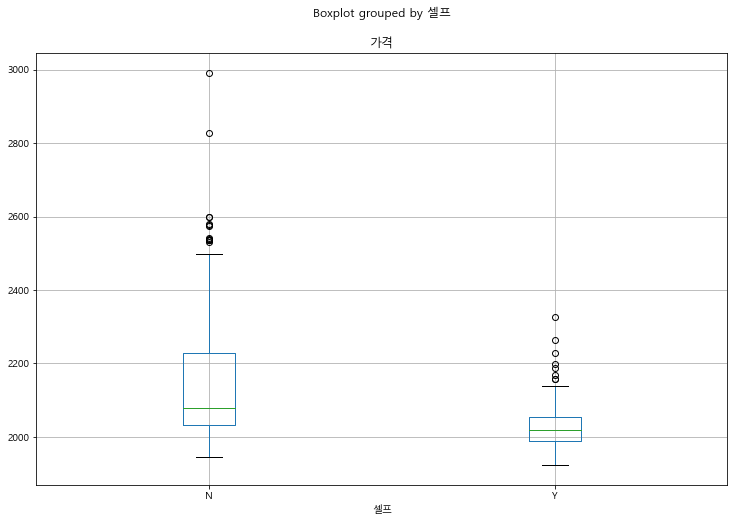

In [64]:
# boxplot (pandas)
stations.boxplot(column="가격", by="셀프", figsize=(12, 8))

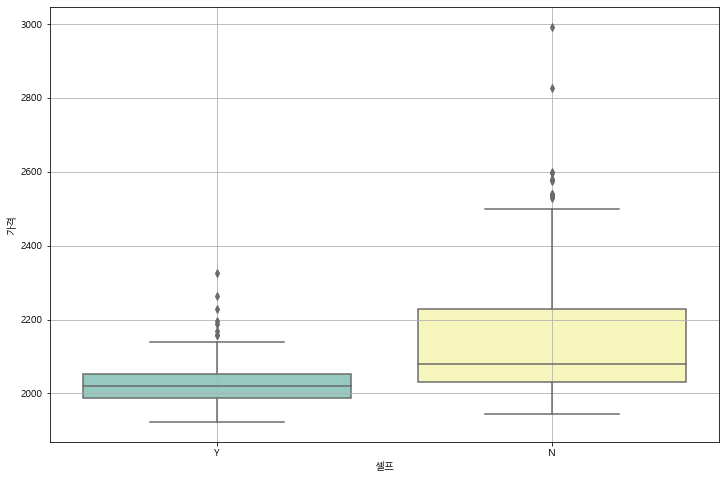

In [65]:
# boxplot (seaborn)
plt.figure(figsize=(12, 8))
sns.boxplot(x="셀프", y="가격", data=stations, palette="Set3")
plt.grid(True)
plt.show()

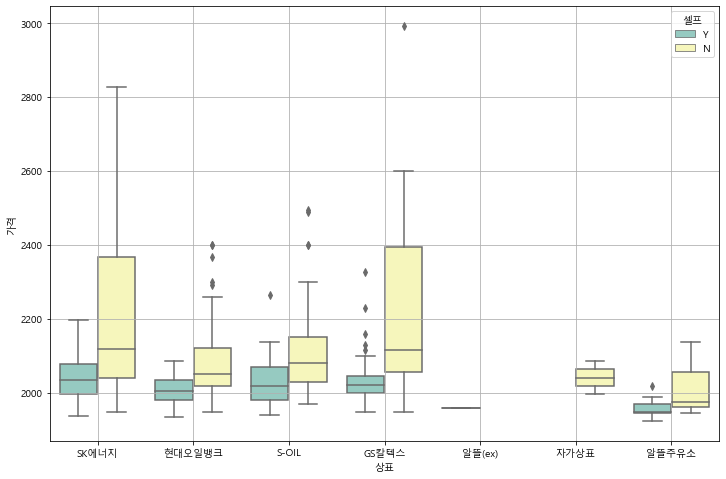

In [66]:
# boxplot (seaborn)
plt.figure(figsize=(12, 8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations, palette="Set3")
plt.grid(True)
plt.show()

In [67]:
# 지도 시각화
import json
import folium
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [68]:
# 가장 비싼 주유소 10개
stations.sort_values(by="가격", ascending=False).head()

,상호,주소,가격,셀프,상표,구
281,서계주유소,서울특별시 용산구 청파로 367 (청파동),2992.0,N,GS칼텍스,용산구
315,서남주유소,서울 중구 통일로 30,2827.0,N,SK에너지,중구
314,필동주유소,서울 중구 퇴계로 196 (필동2가),2599.0,N,GS칼텍스,중구
33,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구
280,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2580.0,N,SK에너지,용산구


In [69]:
# 가장 값싼 주유소 10개
stations.sort_values(by="가격").head()

,상호,주소,가격,셀프,상표,구
203,양천구주유소,서울 양천구 국회대로 275 (목동),1922.0,Y,알뜰주유소,양천구
341,행촌에너지 공항주유소,서울 강서구 개화동로 420 (개화동),1935.0,Y,현대오일뱅크,강서구
342,강서오곡셀프주유소,서울 강서구 벌말로 254 (오곡동),1937.0,Y,SK에너지,강서구
77,에스오일(주) 염리동주유소,서울 마포구 백범로 126 (염리동),1939.0,Y,S-OIL,마포구
204,현대주유소,서울 양천구 남부순환로 372 (신월동),1945.0,Y,S-OIL,양천구


In [71]:
import numpy as np

gu_data = pd.pivot_table(data=stations, index="구", values="가격", aggfunc=np.mean)
gu_data.head() #구별 평균가격

,가격
구,
강남구,2229.352941
강동구,2123.642857
강북구,1982.500000
강서구,2036.125000
관악구,2082.142857


In [ ]:
geo_path = ""
geo_str = json.load(open(geo_path, encoding="utf-8"))

my_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, title="Stamen Toner")
my_map.choropleth(
    geo_data=geo_str,
    data=gu_data,
    columns=[gu_data.index, "가격"],
    key_on="feature.id",
fill_color="PuRd"
)

In [ ]:
my_map